# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [101]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-26 20:12:04--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.3’

car_data.csv.3      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-11-26 20:12:05 (4.17 MB/s) - ‘car_data.csv.3’ saved [58374/58374]



In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [103]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [104]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [105]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [106]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'bus': 132, 'opel': 152, 'saab': 133, 'van': 132}

The selection was balance, we dont need to do anything. Multi encoding or hot coding, we dont need to use because the values are numerical. 

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [108]:
from sklearn.linear_model import LogisticRegression
! pip install scikit-plot
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from scikitplot.metrics import plot_roc

estimator = LogisticRegression(solver='saga', multi_class='multinomial', max_iter= 500, tol=1e-3, random_state=42)
estimator.get_params().keys()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [109]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {'C': [0.1, 1, 2, 5, 10, 15, 20, 50, 100], 'penalty': ['l1', 'l2']}
cv = 4
grid = GridSearchCV(estimator, param_grid, cv=cv)
#optimizer.fit(X_train_scaled, y_train)
grid.fit(X_train_scaled, y_train)



GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.1, 1, 2, 5, 10, 15, 20, 50, 100],
                         'penalty': ['l1', 'l2']})

In [110]:
optimal_logistic_regression = LogisticRegression(penalty=grid.best_params_['penalty'], 
                                              C=grid.best_params_['C'], solver='saga', 
                                              multi_class='multinomial', max_iter= 500, 
                                              tol=1e-3, random_state=42)
optimal_logistic_regression.fit(X_train_scaled, y_train)

y_pred = optimal_logistic_regression.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.8215488215488216, f1 score: 0.8172354790972993


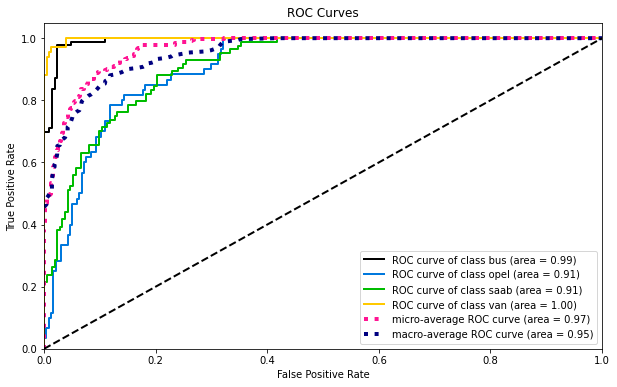

In [79]:
y_pred = optimal_logistic_regression.predict_proba(X_test_scaled)
plot_roc(y_test, y_pred, figsize = (10, 6))

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

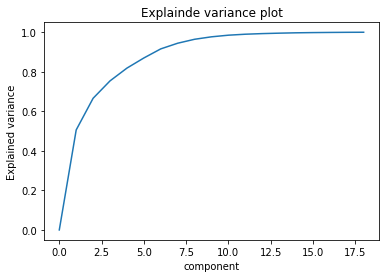

In [80]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_
plt.plot([np.sum(exp_var_pca[:i]) for i in range(len(exp_var_pca))])
plt.title('Explainde variance plot')
plt.xlabel('component')
plt.ylabel('Explained variance')

plt.show()

We see here that the first 11 components almost characterize the sample

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [111]:
N_COMPONENTS = 11
pca = PCA(n_components=N_COMPONENTS, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Using pipeline to prevent data leak

In [116]:
from sklearn.pipeline import Pipeline
pca_pipeline = Pipeline(steps=
                         (('Scaler', StandardScaler()),
                         ('PCA', PCA(n_components=11, random_state=42)),
                         ('Estimator', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                                                         max_iter=500, random_state=42)
                         )))
param_grid = {
     'Estimator__C': [0.001, 1, 2, 5, 10, 15, 20, 30, 55, 100, 150, 200], 'Estimator__penalty': ['l1', 'l2']
 }
log_regressor = GridSearchCV(pca_pipeline, param_grid, cv=5)
log_regressor.fit(X_train, y_train)
y_pred = log_regressor.predict(X_test)
print('Accuracy score =', accuracy_score(y_pred, y_test))
print('F1 score =', f1_score(y_pred, y_test, average='macro'))


Accuracy score = 0.7138047138047138
F1 score = 0.7045718979040414


Decrease 10%

              precision    recall  f1-score   support

         bus       0.81      0.91      0.86        86
        opel       0.46      0.62      0.52        60
        saab       0.66      0.42      0.51        84
         van       0.93      0.93      0.93        67

    accuracy                           0.71       297
   macro avg       0.71      0.72      0.70       297
weighted avg       0.72      0.71      0.71       297



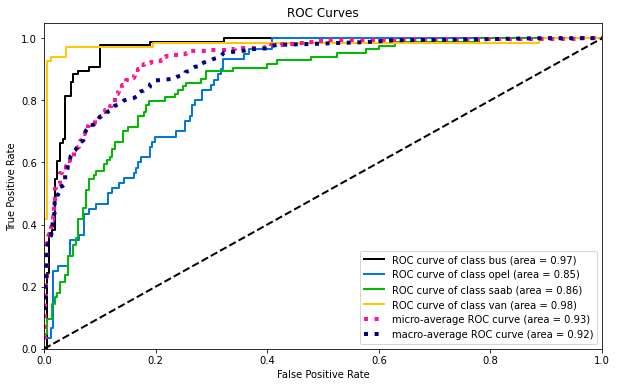

In [117]:
print(classification_report(y_test, y_pred))
y_pred = log_regressor.predict_proba(X_test)
plot_roc(y_test, y_pred, figsize = (10, 6))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 7}


Text(0, 0.5, 'Score')

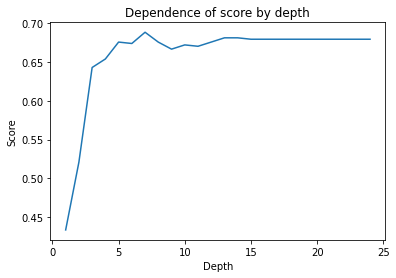

In [122]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(1, 25)}
estimator = DecisionTreeClassifier(random_state=42)
log_regressor = GridSearchCV(estimator, param_grid, cv=4)
log_regressor.fit(X_train_scaled, y_train)
print(log_regressor.best_params_)
log_regressor.fit(X_train_scaled, y_train)
plt.plot(np.arange(1, 25), log_regressor.cv_results_['mean_test_score'])
plt.title('Dependence of score by depth')
plt.xlabel("Depth")
plt.ylabel('Score')


We see the tree depth around 7 , the graph becomes asymptote

In [123]:
optimal_dectree_estimator = DecisionTreeClassifier(max_depth=log_regressor.best_params_['max_depth'], random_state=42)

optimal_dectree_estimator.fit(X_train_scaled, y_train)

y_pred = optimal_dectree_estimator.predict(X_test_scaled)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.6767676767676768, f1 score: 0.6522175823646411


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.89      0.85      0.87        86
        opel       0.48      0.33      0.39        60
        saab       0.57      0.62      0.59        84
         van       0.69      0.84      0.76        67

    accuracy                           0.68       297
   macro avg       0.66      0.66      0.65       297
weighted avg       0.67      0.68      0.67       297



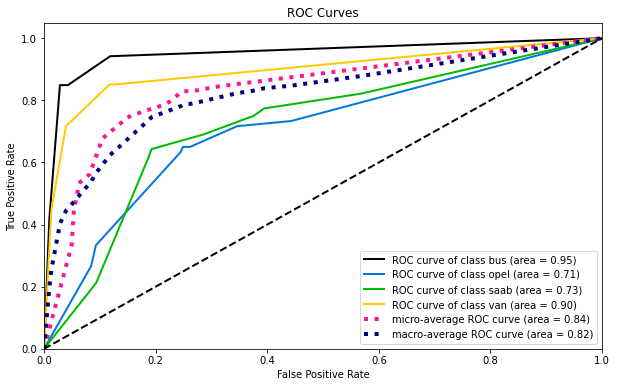

In [125]:
y_pred = optimal_dectree_estimator.predict_proba(X_test_scaled)
plot_roc(y_test, y_pred, figsize = (10, 6))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

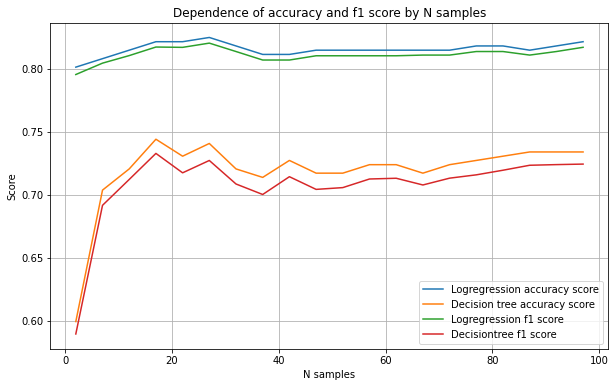

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
import scipy.stats as sps

Ns = np.arange(2,100,5);
train = np.hstack((X_train_scaled, y_train[:, np.newaxis]))

all_train = []
for _ in range(100):
    all_train.append(resample(train))
logregression_pred = []
dectree_pred = []

for cur_train in all_train:
    optimal_logistic_regression.fit(cur_train[:, :-1], cur_train[:, -1])
    optimal_dectree_estimator.fit(cur_train[:, :-1], cur_train[:, -1])
    logregression_pred.append([optimal_logistic_regression.predict(X_test_scaled)])
    dectree_pred.append([optimal_dectree_estimator.predict(X_test_scaled)])

logregression_pred = np.asarray(logregression_pred)
dectree_pred = np.asarray(dectree_pred)

av_logregression_pred = []
av_dectree_pred = []

for N in Ns:
    av_logregression_pred.append(sps.mode(logregression_pred[:N], axis=0)[0])
    av_dectree_pred.append(sps.mode(dectree_pred[:N], axis=0)[0])
logreg_accuracy_scores = []
dectree_accuracy_scores = []
logreg_f1_scores = []
dectree_f1_scores = []

for i in range(len(Ns)):
    logreg_accuracy_scores.append(accuracy_score(np.ravel(av_logregression_pred[i]), y_test))
    dectree_accuracy_scores.append(accuracy_score(np.ravel(av_dectree_pred[i]), y_test))
    
    logreg_f1_scores.append(f1_score(np.ravel(av_logregression_pred[i]), y_test, average='macro'))
    dectree_f1_scores.append(f1_score(np.ravel(av_dectree_pred[i]), y_test, average='macro'))
# plotting 
plt.figure(figsize=(10, 6))
plt.plot(Ns, logreg_accuracy_scores, label='Logregression accuracy score')
plt.plot(Ns, dectree_accuracy_scores, label='Decision tree accuracy score')
plt.plot(Ns, logreg_f1_scores, label='Logregression f1 score')
plt.plot(Ns, dectree_f1_scores, label='Decisiontree f1 score')

plt.title('Dependence of accuracy and f1 score by N samples')
plt.xlabel("N samples")
plt.ylabel('Score')
plt.legend()
plt.grid(':')
plt.show()

In [ ]:
#logreg_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_logistic_regression, n_estimators = 40, random_state=42)
#dectree_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_dectree_estimator, n_estimators = 100, random_state=42)

For optimal hyperparameters, we see that they are quite dependent on the sample, since if we added random_state to train_test_split, they turned out to be completely different in C order, so most likely the parameters are not optimal. 

Optimal number of tree according to the graph is around 7, for linear regression is around 22-23.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

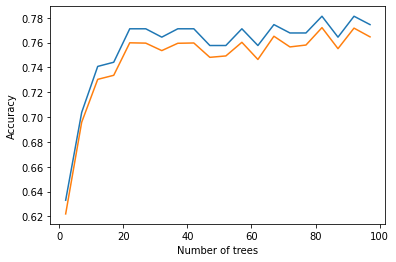

In [90]:
from sklearn.ensemble import RandomForestClassifier

num_of_trees = list(range(2, 100, 5))
accuracy_rf = []
f1_rf = []

for n_estimators in num_of_trees:
    random_forest_clf = RandomForestClassifier(n_estimators=n_estimators)
    random_forest_clf.fit(X_train, y_train)
    
    acc = random_forest_clf.score(X_test, y_test)
    accuracy_rf.append(acc)
    
    y_pred = random_forest_clf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_rf.append(f1_sc)

plt.plot(list(range(2, 100, 5)), accuracy_rf, label = 'accuracy')
plt.plot(list(range(2, 100, 5)), f1_rf, label = 'f1')

plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()


Optimal number of tree is about 20-30. The best we get at 80.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [100]:
## choose best estimator for random forest is 24 
randomforest_best_estimator = RandomForestClassifier(n_estimators = 24, random_state=42);
logreg_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_logistic_regression, n_estimators = 40, random_state=42)
dectree_bagging_best_estimator = BaggingClassifier(base_estimator = optimal_dectree_estimator, n_estimators = 100, random_state=42)

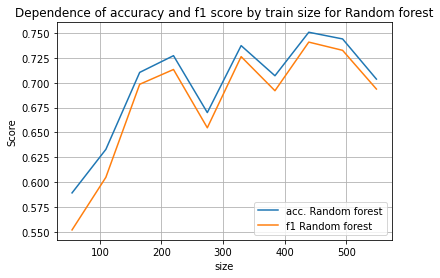

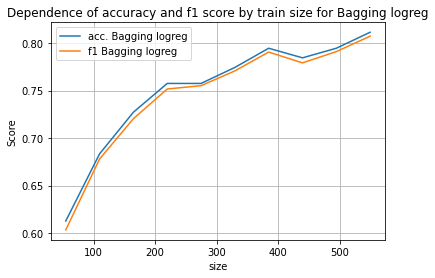

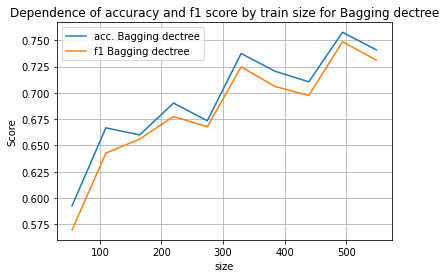

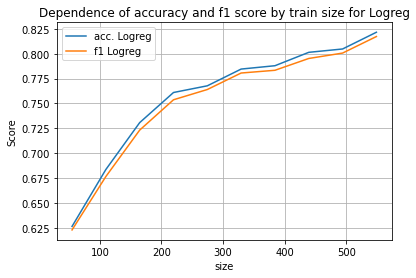

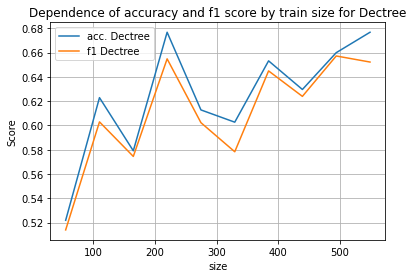

In [99]:
from sklearn.model_selection import StratifiedKFold

N = 10

def score_by_train_size(Xtrain, ytrain, Xtest, ytest, estimator, estimator_name):
    accuracy = []
    f1score = []
    
    all_train_ind = []
    
    skf = StratifiedKFold(n_splits=N, shuffle=True, random_state = 42)
    
    for train_index, test_index in skf.split(Xtrain, ytrain):
        all_train_ind.extend(test_index)
        estimator.fit(Xtrain[all_train_ind], ytrain[all_train_ind])
        ypred = estimator.predict(Xtest)
        accuracy.append(accuracy_score(ytest, ypred))
        f1score.append(f1_score(ytest, ypred,average='macro'))

    plt.plot(np.arange(1, 11) * len(Xtrain) / 10, accuracy, label='acc. {}'.format(estimator_name))
    plt.plot(np.arange(1, 11) * len(Xtrain) / 10, f1score, label='f1 {}'.format(estimator_name))
    plt.title('Dependence of accuracy and f1 score by train size for {}'.format(estimator_name))
    plt.xlabel("size")
    plt.ylabel('Score')
    plt.legend()
    plt.grid(':')
    plt.show()
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, randomforest_best_estimator, 'Randomforest')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, logreg_bagging_best_estimator, 'Bagging logregression')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, dectree_bagging_best_estimator, 'Bagging decisiontree')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, optimal_logistic_regression, 'Logregression')
score_by_train_size(X_train_scaled, y_train, X_test_scaled, y_test, optimal_dectree_estimator, 'Decisiontree')

each model  increases in accuracy and f1 score as train size increases. , also we see that regardless of the sample size, a decision tree without composition and improvements is quite a weak algorithm, most likely due to overfitting. And according to the graph, log reg and bagging log reg do not have much improvement much, the spread in log reg is small. We see  that the accuracy of the decision tree is somehow not good if we compare it with other cases,